# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = url + "units=" + units + "&appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]  

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})    

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sinop
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | palmer
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 6 of Set 1 | ancud
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | carlsbad
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | ishigaki
Processing Record 12 of Set 1 | ha'il
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | oltinko'l
Processing Record 16 of Set 1 | nova sintra
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | brookings
Processing Record 19 of Set 1 | carroll
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | edinburgh of the seven seas
Pro

Processing Record 41 of Set 4 | tuttle
Processing Record 42 of Set 4 | olonkinbyen
Processing Record 43 of Set 4 | guerrero negro
Processing Record 44 of Set 4 | tanjung pandan
Processing Record 45 of Set 4 | atherton
Processing Record 46 of Set 4 | petropavlovsk-kamchatsky
Processing Record 47 of Set 4 | fuvahmulah
City not found. Skipping...
Processing Record 48 of Set 4 | colac
Processing Record 49 of Set 4 | parauapebas
Processing Record 0 of Set 5 | twentynine palms
Processing Record 1 of Set 5 | crane
Processing Record 2 of Set 5 | north bend
Processing Record 3 of Set 5 | seguela
Processing Record 4 of Set 5 | tofol
Processing Record 5 of Set 5 | fabens
Processing Record 6 of Set 5 | usogorsk
Processing Record 7 of Set 5 | fortaleza
Processing Record 8 of Set 5 | klyuchi
Processing Record 9 of Set 5 | thabazimbi
Processing Record 10 of Set 5 | tchibanga
Processing Record 11 of Set 5 | sos'va
Processing Record 12 of Set 5 | irymple
Processing Record 13 of Set 5 | arawa
Processing

Processing Record 32 of Set 8 | iskateley
Processing Record 33 of Set 8 | pariaman
Processing Record 34 of Set 8 | okhotsk
Processing Record 35 of Set 8 | caleta de carquin
Processing Record 36 of Set 8 | gamboula
Processing Record 37 of Set 8 | sitangkai
Processing Record 38 of Set 8 | thunder bay
Processing Record 39 of Set 8 | tanjung pinang
Processing Record 40 of Set 8 | oranjestad
Processing Record 41 of Set 8 | illizi
Processing Record 42 of Set 8 | remire-montjoly
Processing Record 43 of Set 8 | ivins
Processing Record 44 of Set 8 | college
Processing Record 45 of Set 8 | mohr
Processing Record 46 of Set 8 | elverum
Processing Record 47 of Set 8 | odda
Processing Record 48 of Set 8 | bikenibeu village
Processing Record 49 of Set 8 | fomboni
Processing Record 0 of Set 9 | salalah
Processing Record 1 of Set 9 | mejit
Processing Record 2 of Set 9 | sosua
Processing Record 3 of Set 9 | mogocha
Processing Record 4 of Set 9 | kailua-kona
Processing Record 5 of Set 9 | kabinda
Process

Processing Record 23 of Set 12 | alghero
Processing Record 24 of Set 12 | gillette
Processing Record 25 of Set 12 | trairi
Processing Record 26 of Set 12 | mizhhirya
Processing Record 27 of Set 12 | san andres
Processing Record 28 of Set 12 | eureka
Processing Record 29 of Set 12 | aykhal
Processing Record 30 of Set 12 | san lawrenz
Processing Record 31 of Set 12 | shagonar
Processing Record 32 of Set 12 | veraval
Processing Record 33 of Set 12 | xanthi
Processing Record 34 of Set 12 | raton
Processing Record 35 of Set 12 | east london
Processing Record 36 of Set 12 | shevchenko
Processing Record 37 of Set 12 | yerofey pavlovich
Processing Record 38 of Set 12 | parczew
Processing Record 39 of Set 12 | kodinsk
Processing Record 40 of Set 12 | darhan
Processing Record 41 of Set 12 | cockburn town
Processing Record 42 of Set 12 | gaspe
Processing Record 43 of Set 12 | santa cruz del sur
Processing Record 44 of Set 12 | cedeira
Processing Record 45 of Set 12 | porto novo
------------------

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sinop,41.7711,34.8709,1.24,61,46,5.02,TR,1701066063
1,grytviken,-54.2811,-36.5092,0.99,88,61,5.85,GS,1701066619
2,palmer,42.1584,-72.3287,11.59,82,100,2.06,US,1701066619
3,ancud,-41.8697,-73.8203,9.29,85,100,1.59,CL,1701066619
4,stanley,54.8680,-1.6985,3.62,96,40,2.57,GB,1701066619


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sinop,41.7711,34.8709,1.24,61,46,5.02,TR,1701066063
1,grytviken,-54.2811,-36.5092,0.99,88,61,5.85,GS,1701066619
2,palmer,42.1584,-72.3287,11.59,82,100,2.06,US,1701066619
3,ancud,-41.8697,-73.8203,9.29,85,100,1.59,CL,1701066619
4,stanley,54.8680,-1.6985,3.62,96,40,2.57,GB,1701066619


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

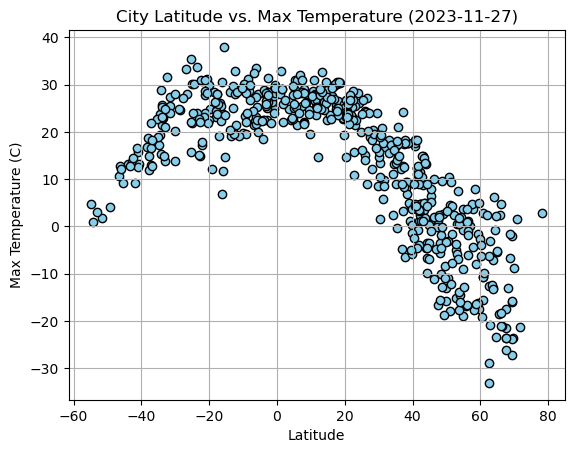

In [8]:
# calculate date based on the median of all recorded "timestamp"
import datetime
date = city_data_df["Date"].median()
date = datetime.date.fromtimestamp(date)

# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis,y_axis, c="skyblue", edgecolors= "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

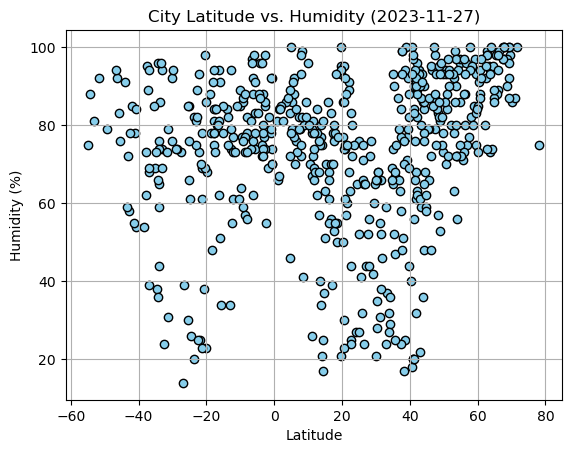

In [9]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis,y_axis, c="skyblue", edgecolors= "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

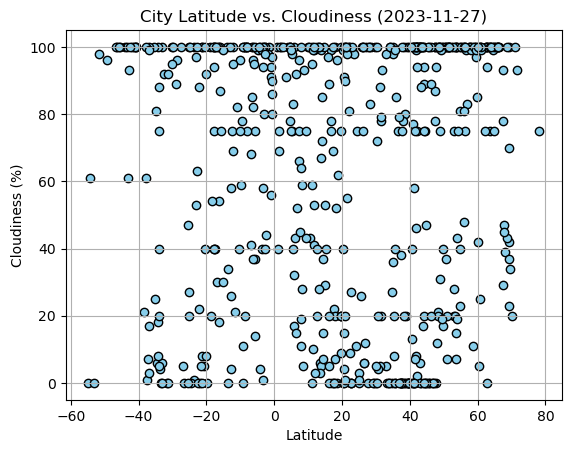

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis,y_axis, c="skyblue", edgecolors= "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

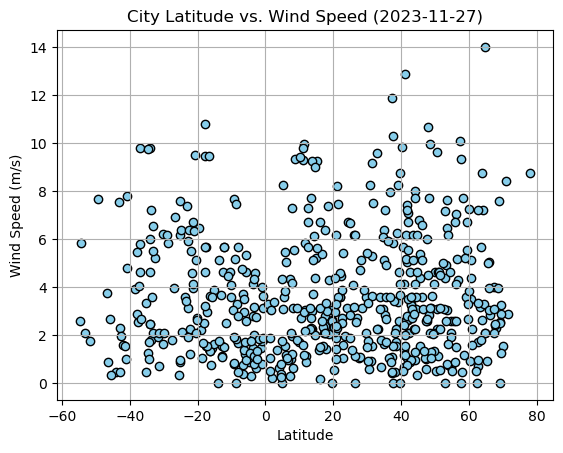

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis,y_axis, c="skyblue", edgecolors= "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linRegPlot(x_axis, y_axis):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    print(f"The r value is: {rvalue}")
    
    # build scatter plot
    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values, color = "red")
    
    plt.annotate(line_eq,(x_axis.min(),y_axis.min()),fontsize=15,color="red")
    
    plt.xlabel("Latitude")
    plt.ylabel(y_axis.name)
    
    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sinop,41.7711,34.8709,1.24,61,46,5.02,TR,1701066063
2,palmer,42.1584,-72.3287,11.59,82,100,2.06,US,1701066619
4,stanley,54.8680,-1.6985,3.62,96,40,2.57,GB,1701066619
5,carlsbad,33.1581,-117.3506,17.68,37,0,2.24,US,1701066619
6,tiksi,71.6872,128.8694,-21.24,100,93,2.86,RU,1701066620


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,0.99,88,61,5.85,GS,1701066619
3,ancud,-41.8697,-73.8203,9.29,85,100,1.59,CL,1701066619
7,margaret river,-33.9500,115.0667,21.38,65,88,5.99,AU,1701066620
10,port-aux-francais,-49.3500,70.2167,4.19,79,96,7.67,TF,1701066620
11,waitangi,-43.9535,-176.5597,13.23,91,100,0.45,NZ,1701066620


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8836884883279034


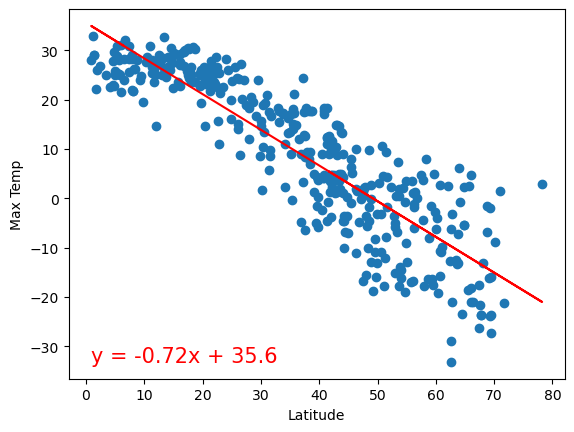

In [15]:
# Linear regression on Northern Hemisphere

# Define x_axis and y_axis
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]

# Create Linear Regression plots
linRegPlot(x_axis, y_axis)

The r value is: 0.6163609066947183


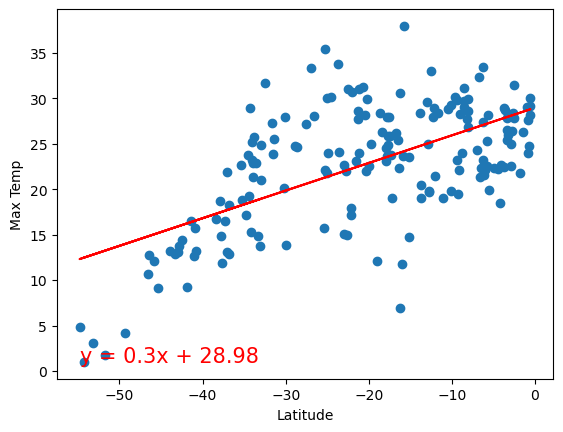

In [16]:
# Linear regression on Southern Hemisphere

# Define x_axis and y_axis
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]

# Create Linear Regression plots
linRegPlot(x_axis, y_axis)

**Discussion about the linear relationship:** The r-value of the scatter plot for the Northern Hemisphere is between -0.5 and -1. The figure is close to -1.
The r-value of the scatter plot for the Southern Hemisphere between 0.5 and 1.
The correlation between the Latitude and Max Temperature of the cities is high.
For Northern Hemisphere, there is high negative correlation between Latitude and Max Temperature.
For Southern Hemisphere, there is moderately high positive correlation between Latitude and Max Temperature.
For both the Northern and Southern Hemisphere, the closer the Latitude to 0 (the equator), the higher the max temperature.


### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.3178754627339117


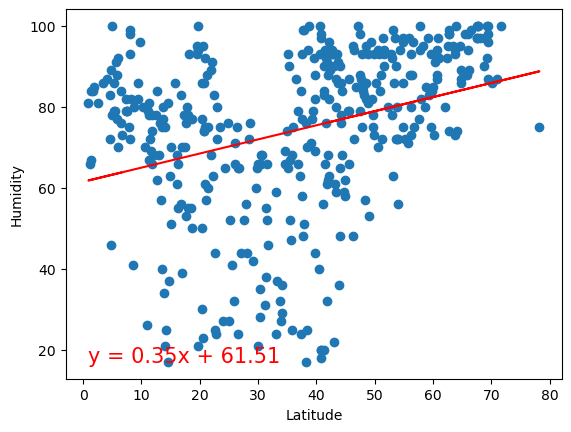

In [17]:
# Northern Hemisphere

# Define x_axis and y_axis
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]

# Create Linear Regression plots
linRegPlot(x_axis, y_axis)

The r value is: 0.13307531346170923


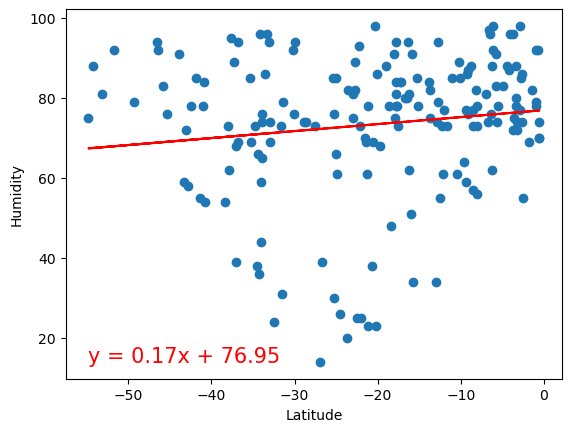

In [18]:
# Southern Hemisphere

# Define x_axis and y_axis
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]

# Create Linear Regression plots
linRegPlot(x_axis, y_axis)

**Discussion about the linear relationship:** The r-value for scatter plot for Northern Hemisphere is between 0 and 0.5. The r-value for scatter plot for Southern Hemisphere is close to 0. The correlation between Latitude and Humidity is low.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.13775652892614024


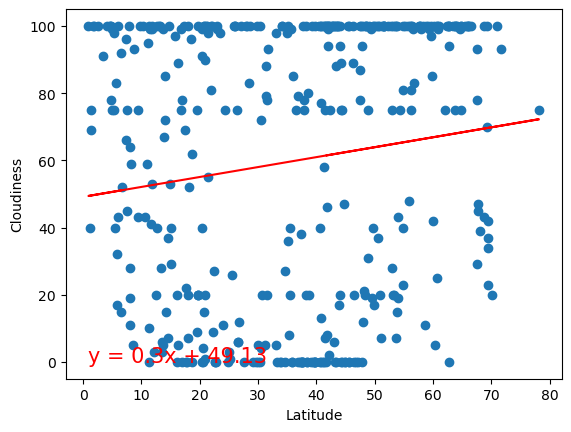

In [19]:
# Northern Hemisphere

# Define x_axis and y_axis
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]

# Create Linear Regression plots
linRegPlot(x_axis, y_axis)

The r value is: 0.12910965072994413


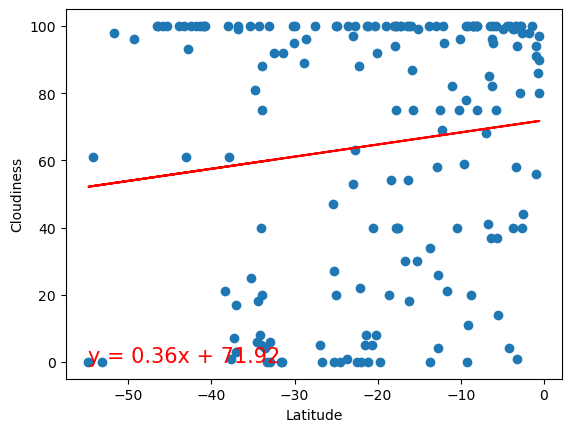

In [20]:
# Southern Hemisphere

# Define x_axis and y_axis
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]

# Create Linear Regression plots
linRegPlot(x_axis, y_axis)

**Discussion about the linear relationship:** The r-values for scatter plots for both Northern Hemisphere and Southern Hemisphere are close to 0. The correlation between Latitude and Cloudiness is low.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.060592956992977606


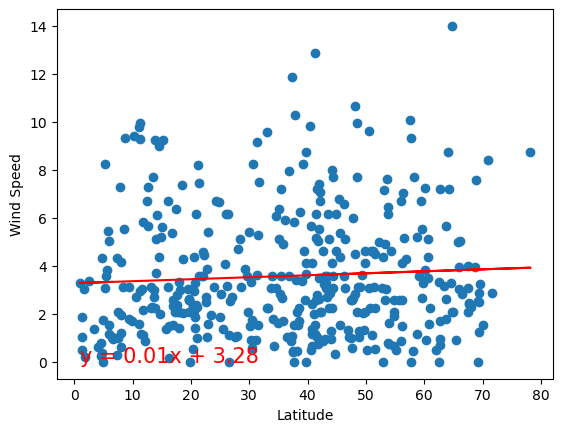

In [21]:
# Northern Hemisphere

# Define x_axis and y_axis
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]

# Create Linear Regression plots
linRegPlot(x_axis, y_axis)

The r value is: -0.18219650847334365


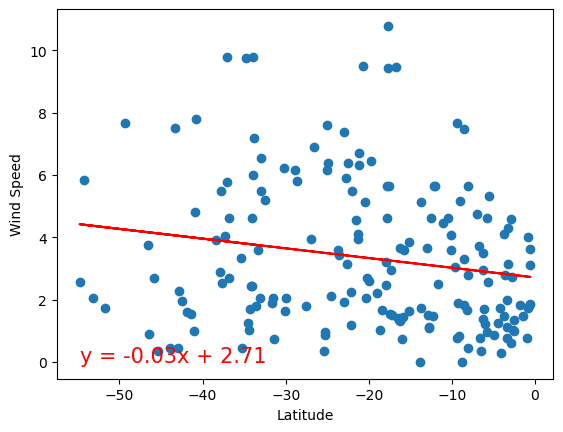

In [22]:
# Southern Hemisphere

# Define x_axis and y_axis
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]

# Create Linear Regression plots
linRegPlot(x_axis, y_axis)

**Discussion about the linear relationship:** The r-values for scatter plots for both Northern Hemisphere and Southern Hemisphere are close to 0. The correlation between Latitude and Wind Speed is low.